In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
from skimage import data
from skimage import transform
from skimage.color import rgb2gray

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "data"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

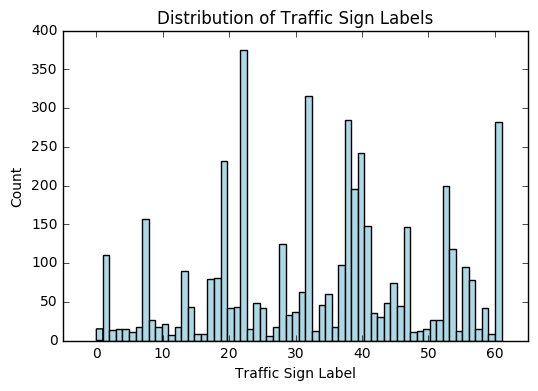

In [3]:
import matplotlib.pyplot as plt 

# make a histogram with 62 bins of labels ndarray
plt.hist(labels, 62, color="lightblue")
plt.title("Distribution of Traffic Sign Labels")
plt.xlabel("Traffic Sign Label")
plt.ylabel("Count")
plt.axis([-5, 65, 0, 400])
plt.show()

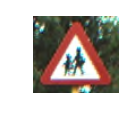

index: [350, 2300, 3700, 4000]
 shape: (70, 76, 3)
 min: 0, max: 255


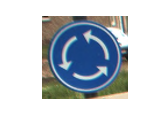

index: [350, 2300, 3700, 4000]
 shape: (146, 148, 3)
 min: 11, max: 255


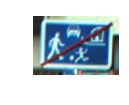

index: [350, 2300, 3700, 4000]
 shape: (62, 88, 3)
 min: 0, max: 255


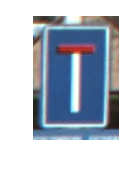

index: [350, 2300, 3700, 4000]
 shape: (100, 68, 3)
 min: 17, max: 255


In [11]:
# determine 4 random indexes of the images we are interested in
traffic_signs = [350, 2300, 3700, 4000]

# fill out the subplots with the random images that you defined 
for index, traffic_sign in enumerate(traffic_signs):
    plt.subplot(1, 4, index+1)
    plt.axis('off')
    plt.imshow(images[traffic_sign])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("index: {0}\n shape: {1}\n min: {2}, max: {3}".format(traffic_signs,
                                                  images[traffic_sign].shape, 
                                                  images[traffic_sign].min(), 
                                                  images[traffic_sign].max()))

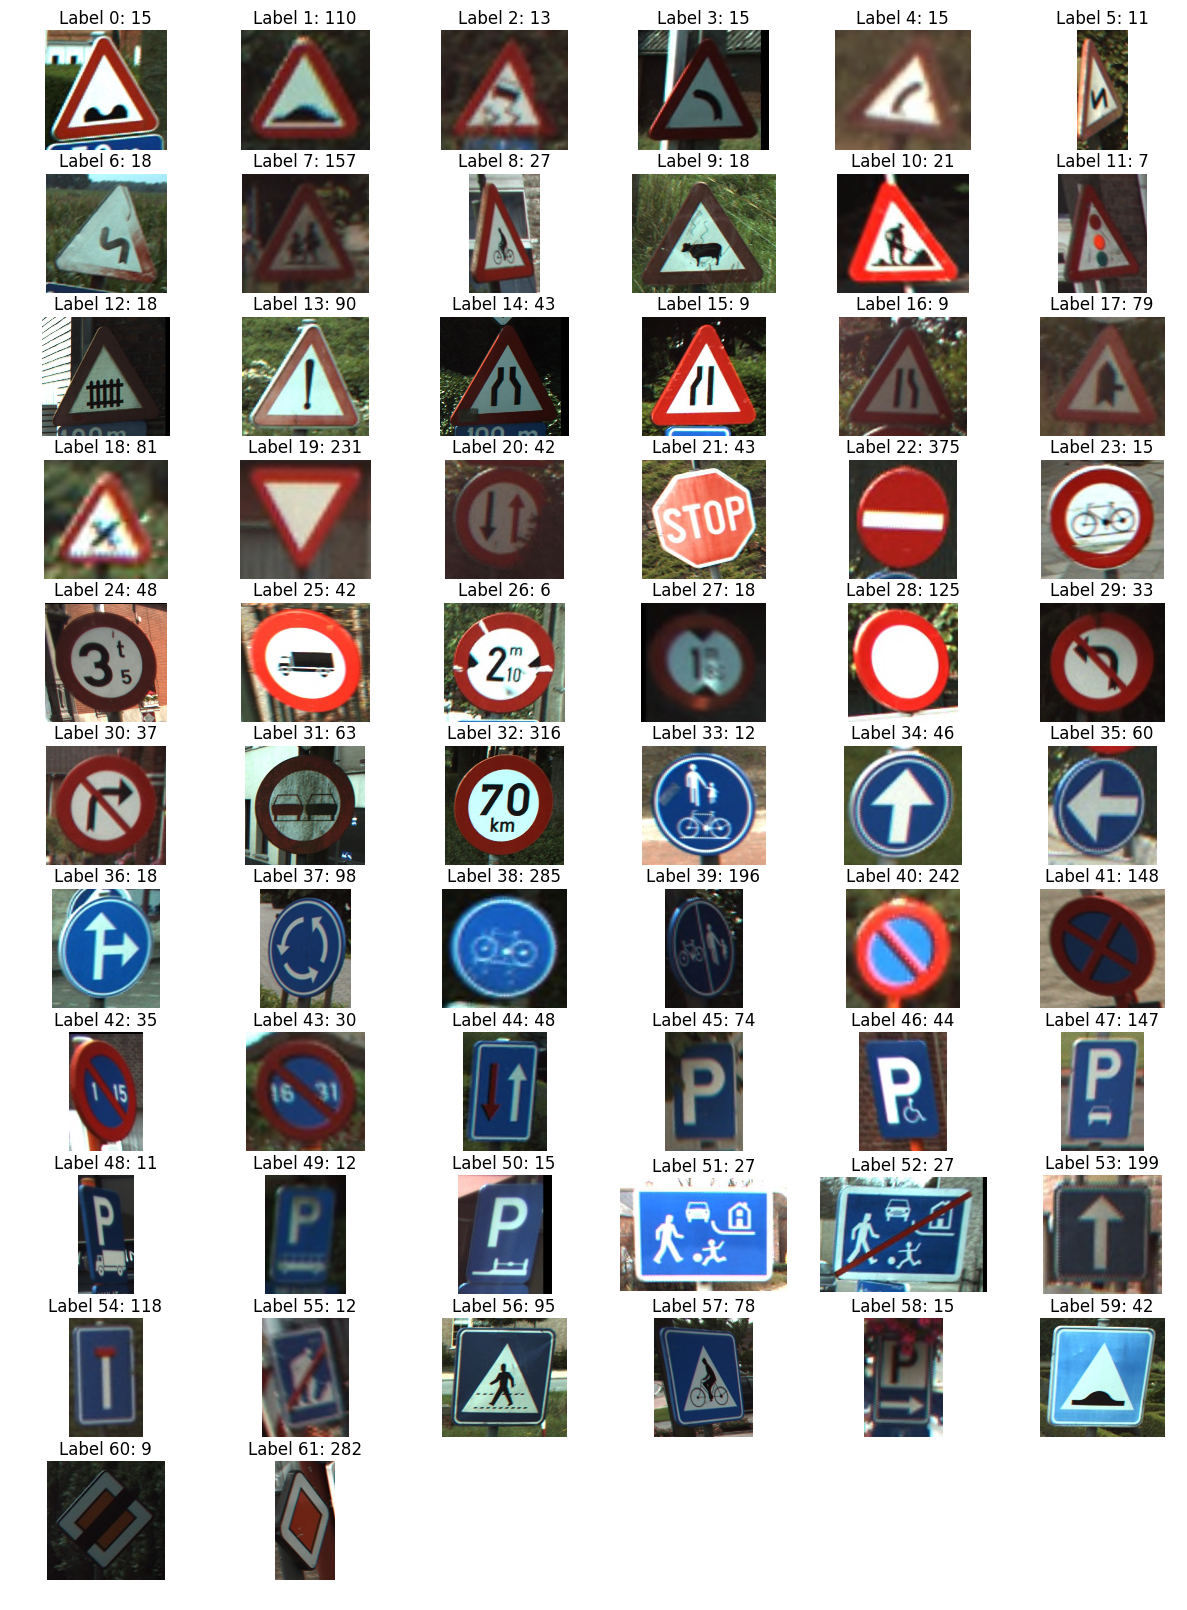

In [10]:
# set up the figure
plt.figure(figsize=(15, 20))

for i, label in enumerate(set(labels)):
    # get the first image for each label
    image = images[labels.index(label)]
    # set up 66 subplots 
    plt.subplot(11, 6, i+1)
    # exclude axes
    plt.axis('off')
    # add a title which shows the label index and image quantity to each subplot 
    plt.title("Label {0}: {1}".format(label, labels.count(label)))
    # plot this first image 
    plt.imshow(image)
    
# show the plot
plt.show()

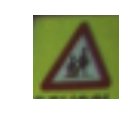

index: 300
 shape: (28, 28, 3)
 min: 0.06176470588235293, max: 0.6161764705882353


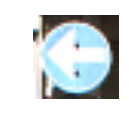

index: 2250
 shape: (28, 28, 3)
 min: 0.07634053621448582, max: 1.0


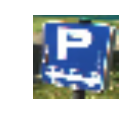

index: 3650
 shape: (28, 28, 3)
 min: 0.08464760904361561, max: 1.0


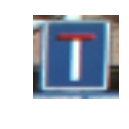

index: 4000
 shape: (28, 28, 3)
 min: 0.08907563025210094, max: 1.0


In [16]:
# rescale the images in images list
images28 = [transform.resize(img, (28, 28)) for img in images]

# fill out the subplots with the random images that you defined 
for index, traffic_sign in enumerate(traffic_signs):
    plt.subplot(1, 4, index+1)
    plt.axis('off')
    plt.imshow(images28[traffic_sign])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("index: {0}\n shape: {1}\n min: {2}, max: {3}".format(traffic_sign,
                                                  images28[traffic_sign].shape, 
                                                  images28[traffic_sign].min(), 
                                                  images28[traffic_sign].max()))

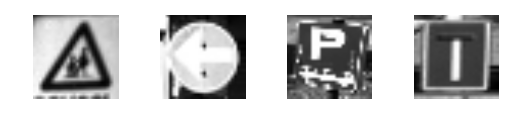

In [19]:
# convert images28 to an array
images28 = np.array(images28)

# convert images28 to grayscale
images28 = rgb2gray(images28)

for index, traffic_sign in enumerate(traffic_signs):
    plt.subplot(1, 4, index+1)
    plt.axis('off')
    plt.imshow(images28[traffic_sign], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

In [25]:
# initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

# define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

# convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)
print("")


tf.set_random_seed(1234)
test_session = tf.Session()

test_session.run(tf.global_variables_initializer())

for i in range(201):
    _, accuracy_val = test_session.run([train_op, accuracy], feed_dict={x: images28, y: labels})
    if i % 10 == 0:
        print("Loss: ", loss)
    
# pick 10 images randomly
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# run correct_pred operation
predicted = test_session.run([correct_pred], feed_dict={x: sample_images})[0]

# close test_session
test_session.close()

images_flat:  Tensor("Flatten_1/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_1/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)

Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_

the real and predicted labels
real labels:  [37, 22, 37, 40, 1, 32, 3, 18, 24, 7]
predicted labels:  [37 22 37 40  1 32 13 17 61  7]



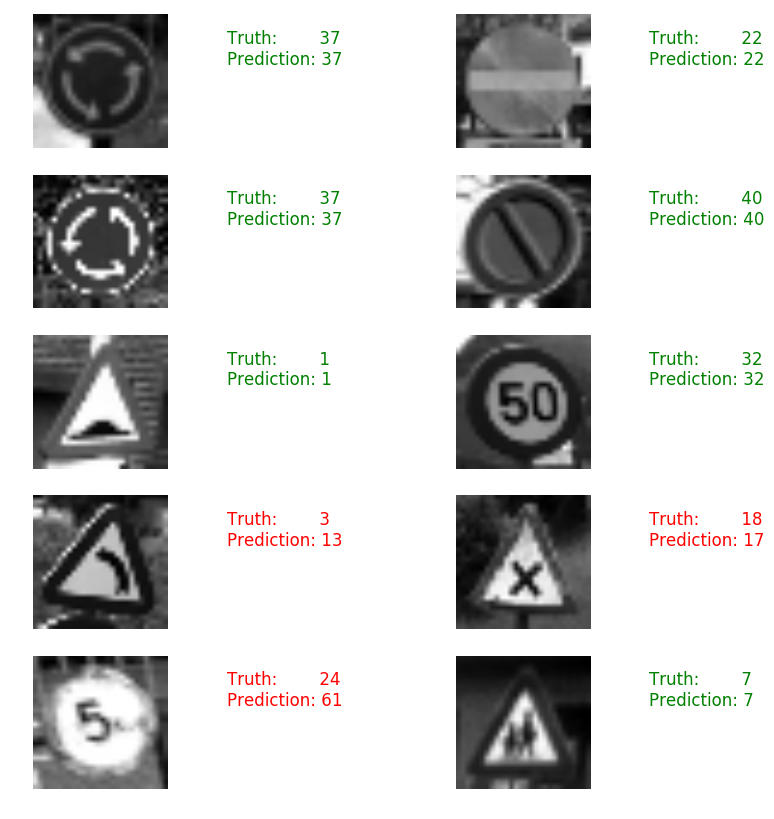

In [24]:
# print the real and predicted labels
print("the real and predicted labels")
print("real labels: ", sample_labels)
print("predicted labels: ", predicted)
print("")

# display the predictions and the ground truth visually
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2, 1+i)
    plt.axis('off')
    color = 'green' 
    if truth != prediction:
        color = 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [26]:
# initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

# define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

# convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)
print("")


tf.set_random_seed(1234)

test_session = tf.Session()
test_session.run(tf.global_variables_initializer())

for i in range(201):
    _, loss_value = test_session.run([train_op, loss], feed_dict={x: images28, y: labels})
    if i % 10 == 0:
        print("Loss: ", loss)

# pick 10 images randomly
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# run correct_pred operation
predicted = test_session.run([correct_pred], feed_dict={x: sample_images})[0]

# close test_session
test_session.close()

images_flat:  Tensor("Flatten_2/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_2/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_2:0", shape=(?,), dtype=int64)

Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_

the real and predicted labels
real labels:  [7, 18, 34, 13, 19, 38, 38, 17, 32, 19]
predicted labels:  [ 7 18 53 13 38 38 38 17 32 32]



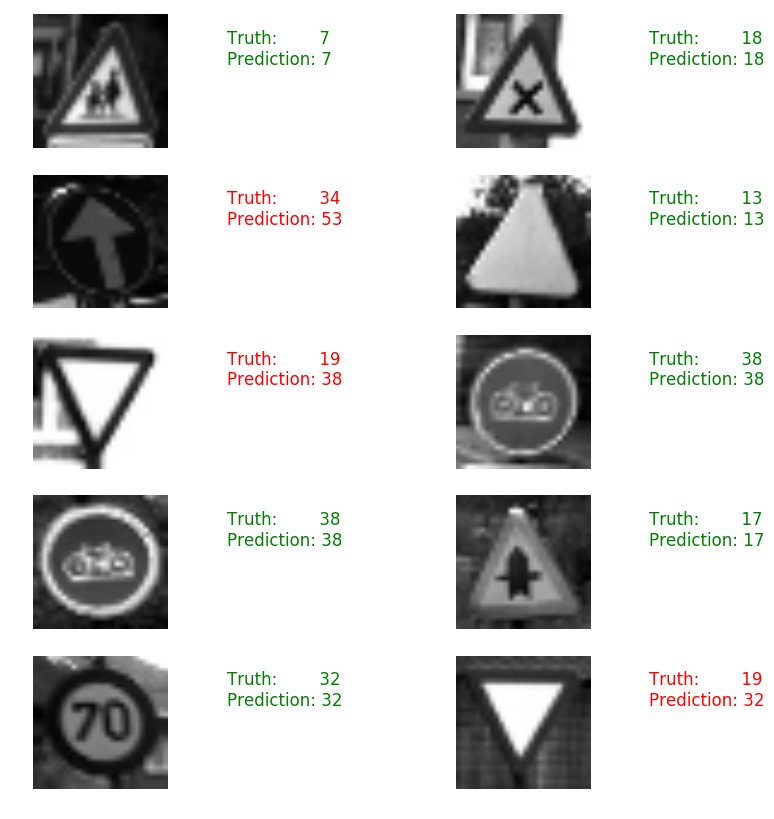

In [27]:
# print the real and predicted labels
print("the real and predicted labels")
print("real labels: ", sample_labels)
print("predicted labels: ", predicted)
print("")

# display the predictions and the ground truth visually
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2, 1+i)
    plt.axis('off')
    color = 'green' 
    if truth != prediction:
        color = 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [ ]:
import os
from skimage import data


def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "data"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

# load the train data
images, labels = load_data(train_data_directory)

# load the test data
test_images, test_labels = load_data(test_data_directory)


##################################################

from skimage import transform 
import numpy as np

# rescale the images in images list
images28 = [transform.resize(img, (28, 28)) for img in images]

# rescale the images in test_images28 list
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]


# convert images28 to an array
images28 = np.array(images28)

# convert test_images28 to an array
test_images28 = np.array(test_images28)


##################################################

from skimage.color import rgb2gray

# convert images28 to grayscale
images28 = rgb2gray(images28)

# convert test_images28 to grayscale
test_images28 = rgb2gray(np.array(test_images28))


##################################################

import tensorflow as tf 

# initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

# define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

# convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)
print("")


tf.set_random_seed(1234)

test_session = tf.Session()
test_session.run(tf.global_variables_initializer())

for i in range(201):
    _, loss_value = test_session.run([train_op, loss], feed_dict={x: images28, y: labels})
    #if i % 10 == 0:
    #    print("Loss: ", loss)


##################################################

import matplotlib.pyplot as plt
import random

# pick 10 images randomly
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# run correct_pred operation
predicted = test_session.run([correct_pred], feed_dict={x: sample_images})[0]

# print the real and predicted labels
print("the real and predicted labels")
print("real labels: ", sample_labels)
print("predicted labels: ", predicted)
print("")

# display the predictions and the ground truth visually
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2, 1+i)
    plt.axis('off')
    color = 'green' 
    if truth != prediction:
        color = 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()


##################################################

# run predictions against the full test set
predicted = test_session.run([correct_pred], feed_dict={x: test_images28})[0]

# close test_session
test_session.close()

# calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# calculate the accuracy
accuracy = match_count / len(test_labels)

# print the accuracy
print("Accuracy: {:.3f}".format(accuracy))


images_flat:  Tensor("Flatten_2/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_2/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_2:0", shape=(?,), dtype=int64)

